In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Load the CSV file into a DataFrame
training_dataset = pd.read_csv('./dataset/customer_churn_dataset-training-master.csv')
testing_dataset = pd.read_csv('./dataset/customer_churn_dataset-testing-master.csv')
# Display the first 5 rows of the DataFrame
# print(df1.head())
# print(df1.columns)
df = pd.concat([training_dataset, testing_dataset], ignore_index=True)

df.head(50)

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0          2.0  30.0  Female    39.0             14.0            5.0   
1          3.0  65.0  Female    49.0              1.0           10.0   
2          4.0  55.0  Female    14.0              4.0            6.0   
3          5.0  58.0    Male    38.0             21.0            7.0   
4          6.0  23.0    Male    32.0             20.0            5.0   
5          8.0  51.0    Male    33.0             25.0            9.0   
6          9.0  58.0  Female    49.0             12.0            3.0   
7         10.0  55.0  Female    37.0              8.0            4.0   
8         11.0  39.0    Male    12.0              5.0            7.0   
9         12.0  64.0  Female     3.0             25.0            2.0   
10        13.0  29.0    Male    18.0              9.0            0.0   
11        14.0  52.0  Female    21.0              6.0            3.0   
12        15.0  22.0    Male    41.0             17.0           10.0   
13        16.0  48.0  Female    35.0             25.0            1.0   
14        17.0  24.0    Male     4.0              9.0            4.0   
15        18.0  49.0    Male    56.0             17.0            2.0   
16        19.0  19.0  Female    38.0             23.0            7.0   
17        20.0  47.0    Male    41.0             14.0            1.0   
18        21.0  24.0    Male    44.0             13.0            5.0   
19        22.0  42.0    Male    15.0             16.0            2.0   
20        23.0  57.0  Female    55.0             27.0            3.0   
21        24.0  39.0  Female    43.0              2.0            4.0   
22        25.0  27.0    Male    44.0             28.0            8.0   
23        26.0  27.0  Female    52.0              8.0            7.0   
24        27.0  59.0    Male    26.0             21.0            0.0   
25        28.0  21.0    Male     2.0             21.0            7.0   
26        29.0  60.0  Female    18.0             16.0            8.0   
27        30.0  65.0  Female    29.0             29.0            0.0   
28        31.0  35.0  Female    38.0             20.0            6.0   
29        32.0  18.0    Male    37.0             15.0            8.0   
30        33.0  56.0  Female    59.0              5.0           10.0   
31        35.0  35.0    Male    40.0             27.0            8.0   
32        36.0  29.0    Male    43.0             12.0            2.0   
33        37.0  20.0    Male    37.0             24.0            7.0   
34        38.0  63.0  Female    51.0              3.0            5.0   
35        39.0  22.0  Female    39.0              8.0            2.0   
36        40.0  25.0  Female    53.0              2.0           10.0   
37        42.0  28.0    Male    24.0             24.0            8.0   
38        43.0  51.0    Male    30.0              4.0           10.0   
39        44.0  32.0    Male     6.0             22.0            3.0   
40        45.0  38.0  Female    28.0             23.0            6.0   
41        46.0  52.0    Male    17.0             26.0            4.0   
42        48.0  37.0    Male    30.0             30.0            7.0   
43        49.0  31.0  Female     4.0             29.0            7.0   
44        50.0  30.0    Male    24.0              7.0            6.0   
45        51.0  23.0  Female    26.0             21.0            7.0   
46        52.0  35.0    Male    37.0             11.0            7.0   
47        53.0  21.0  Female    56.0             11.0            9.0   
48        54.0  56.0  Female    44.0             11.0            2.0   
49        55.0  53.0  Female    18.0             21.0            1.0   

    Payment Delay Subscription Type Contract Length  Total Spend  \
0            18.0          Standard          Annual        932.0   
1             8.0             Basic         Monthly        557.0   
2            18.0             Basic       Quarterly        185.0   
3             7.0          Standard         Monthly        

In [3]:
#List of the columns
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [4]:
#Inspect the churn column
df['Churn']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
505202    1.0
505203    1.0
505204    1.0
505205    1.0
505206    1.0
Name: Churn, Length: 505207, dtype: float64

In [5]:
#Print the shape to understand the size of the dataset and print the data types of all the features
print(df.shape)
print(df.dtypes)

(505207, 12)
CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object


Gender, Subscription Type, and Contract Length are objects so these will need to be converted to be a numerical value

In [6]:
#Check for null values
nan_count = np.sum(df.isnull(), axis=0)
nan_count

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [7]:
row_nan_count = np.sum(df.isnull(), axis=1)
row_nan_count

0         0
1         0
2         0
3         0
4         0
         ..
505202    0
505203    0
505204    0
505205    0
505206    0
Length: 505207, dtype: int64

After looking through the dataset, row 199295 has missing values for all the columns. Therefore, we can remove this row.

In [33]:
df.iloc[199295]

CustomerID           NaN
Age                  NaN
Gender               NaN
Tenure               NaN
Usage Frequency      NaN
Support Calls        NaN
Payment Delay        NaN
Subscription Type    NaN
Contract Length      NaN
Total Spend          NaN
Last Interaction     NaN
Churn                NaN
Name: 199295, dtype: object

In [34]:
#Drop row 199295
df.drop(199295, inplace=True)

In [4]:
#Ensure that row 199295 was removed
df.iloc[199295]

CustomerID           204107.0
Age                      36.0
Gender                 Female
Tenure                   46.0
Usage Frequency          24.0
Support Calls             7.0
Payment Delay             1.0
Subscription Type       Basic
Contract Length       Monthly
Total Spend             118.9
Last Interaction         27.0
Churn                     1.0
Name: 199296, dtype: object

In [35]:
#Recheck for null values
nan_count = np.sum(df.isnull(), axis=0)
nan_count

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [36]:
df.drop(columns=["CustomerID"],inplace=True)

In [13]:
#List the different values for the columns with object type
print(df['Gender'].unique())
print(df['Subscription Type'].unique())
print(df['Contract Length'].unique())


['Female' 'Male']
['Standard' 'Basic' 'Premium']
['Annual' 'Monthly' 'Quarterly']


In [37]:
#Perform one-hot encoding
df_gender = pd.get_dummies(df['Gender'], prefix='Gender')
df = df.join(df_gender)
df.drop(columns='Gender', inplace=True)

df_subscription_type = pd.get_dummies(df['Subscription Type'], prefix='Subscription Type')
df = df.join(df_subscription_type)
df.drop(columns='Subscription Type', inplace=True)

df_contract_length = pd.get_dummies(df['Contract Length'], prefix='Contract Length')
df = df.join(df_contract_length)
df.drop(columns='Contract Length', inplace=True)

In [15]:
# sns.lineplot(x=df['Age'], y=df['Churn'])
# sns.lineplot(x=training_dataset['Age'], y=training_dataset['Churn'])

In [16]:
#Identifying correlations with the label
corr_matrix = round(df.corr(),5)
corrs = corr_matrix['Churn']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted



Churn                         1.00000
Support Calls                 0.51628
Contract Length_Monthly       0.36650
Payment Delay                 0.32978
Age                           0.19122
Gender_Female                 0.16899
Last Interaction              0.12715
Subscription Type_Basic       0.01911
Subscription Type_Standard   -0.00793
Subscription Type_Premium    -0.01101
Tenure                       -0.02131
Usage Frequency              -0.05326
Contract Length_Annual       -0.15271
Contract Length_Quarterly    -0.15635
Gender_Male                  -0.16899
Total Spend                  -0.36968
Name: Churn, dtype: float64

In [17]:
df.describe()

Age         Tenure  Usage Frequency  Support Calls  \
count  505206.000000  505206.000000    505206.000000  505206.000000   
mean       39.704172      31.350435        15.714825       3.833317   
std        12.670577      17.237482         8.619323       3.133603   
min        18.000000       1.000000         1.000000       0.000000   
25%        29.000000      16.000000         8.000000       1.000000   
50%        40.000000      32.000000        16.000000       3.000000   
75%        49.000000      46.000000        23.000000       6.000000   
max        65.000000      60.000000        30.000000      10.000000   

       Payment Delay    Total Spend  Last Interaction          Churn  
count  505206.000000  505206.000000     505206.000000  505206.000000  
mean       13.496843     620.072766         14.610581       0.555203  
std         8.451187     245.319256          8.608286       0.496944  
min         0.000000     100.000000          1.000000       0.000000  
25%         6.000000     446.000000          7.000000       0.000000  
50%        13.000000     648.900000         14.000000       1.000000  
75%        20.000000     824.000000         22.000000       1.000000  
max        30.000000    1000.000000         30.000000       1.000000

In [18]:
# #Visualize the top two correlated features
# df_sample = df.sample(n=30000)
# top_two_corr = list(corrs_sorted[2:4].index)
# df_corrs_sample = df_sample[top_two_corr].copy()
# df_corrs_sample['Churn'] = df_sample['Churn']
# sns.pairplot(data=df_corrs_sample, kind='kde', corner=True)
# #ASK TA about this

In [19]:
# filter_df = df[df['Age']>50]

# filter_df
# filter_df.hist(column='Churn')

# training_dataset[training_dataset['Age']>50].hist(column='Churn')

In [20]:
df[df['Age']>50].head(100)

Age  Tenure  Usage Frequency  Support Calls  Payment Delay  Total Spend  \
1    65.0    49.0              1.0           10.0            8.0        557.0   
2    55.0    14.0              4.0            6.0           18.0        185.0   
3    58.0    38.0             21.0            7.0            7.0        396.0   
5    51.0    33.0             25.0            9.0           26.0        129.0   
6    58.0    49.0             12.0            3.0           16.0        821.0   
..    ...     ...              ...            ...            ...          ...   
262  54.0    56.0              7.0            7.0            4.0        206.0   
265  64.0    25.0             20.0            0.0           23.0        141.0   
268  63.0    44.0             15.0            0.0            3.0        752.0   
270  54.0     3.0             17.0            4.0           27.0        401.0   
273  52.0    33.0             28.0            7.0           11.0        726.0   

     Last Interaction  Churn  Gender_Female  Gender_Male  \
1                 6.0    1.0           True        False   
2                 3.0    1.0           True        False   
3                29.0    1.0          False         True   
5                 8.0    1.0          False         True   
6                24.0    1.0           True        False   
..                ...    ...            ...          ...   
262              20.0    1.0          False         True   
265              12.0    1.0          False         True   
268              26.0    1.0          False         True   
270              21.0    1.0          False         True   
273              27.0    1.0          False         True   

     Subscription Type_Basic  Subscription Type_Premium  \
1                       True                      False   
2                       True                      False   
3                      False                      False   
5                      False                       True   
6                      False                      False   
..                       ...                        ...   
262                    False                      False   
265                    False                      False   
268                    False                       True   
270                    False                      False   
273                     True                      False   

     Subscription Type_Standard  Contract Length_Annual  \
1                         False                   False   
2                         False                   False   
3                          True                   False   
5                         False                    True   
6                          True                   False   
..                          ...                     ...   
262                        True                    True   
265                        True                    True   
268                       False                   False   
270                        True                    True   
273                       False                   False   

     Contract Length_Monthly  Contract Length_Quarterly  
1                       True                      False  
2                      False                       True  
3                       True                      False  
5                      False                      False  
6                      False                       True  
..                       ...                        ...  
262                    False                      False  
265                    False                      False  
268                    False                       True  
270                    False                      False  
273                    False                       True  

[100 rows x 16 columns]

In [21]:
#Normalize the numerical features by scaling values between 0 and 1
# scaler = MinMaxScaler()
# df = scaler.fit_transform(df)
# df_norm_test = pd.DataFrame(df_norm_test, columns=df_testing.columns)
df.shape

(505206, 16)

Spltting the concatenated data into 80/20 training and testing


In [22]:
#Spltting the concatenated data into 80/20 training and testing
from sklearn.model_selection import train_test_split
y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1234)

<Figure size 600x300 with 0 Axes>

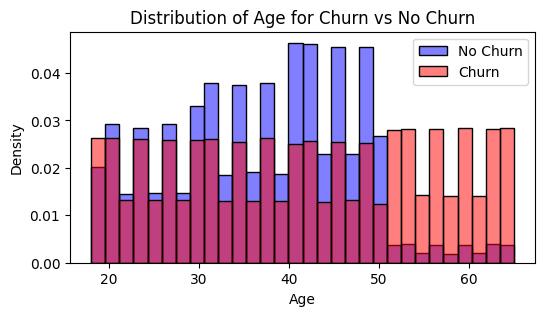

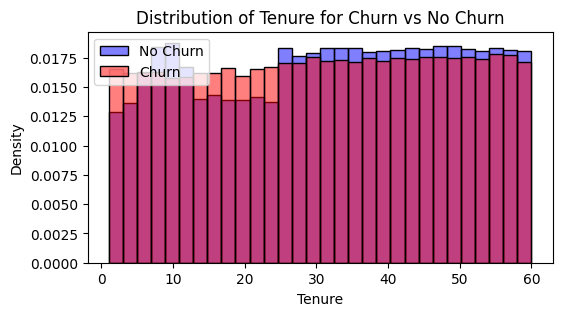

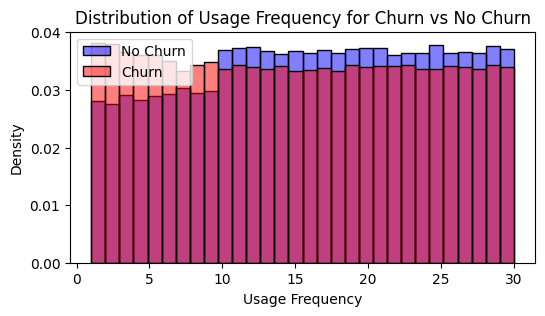

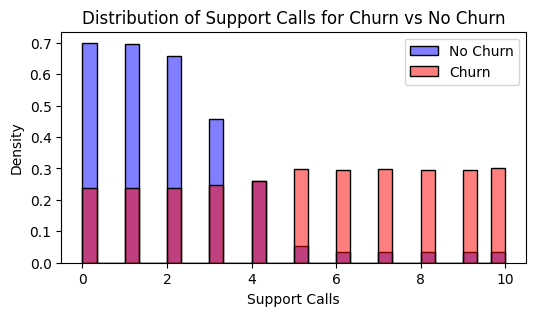

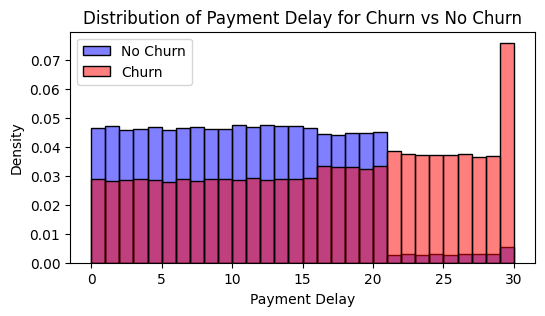

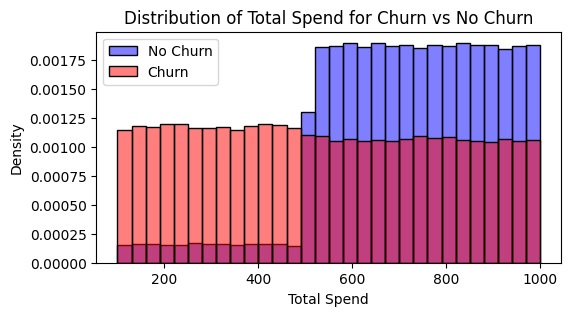

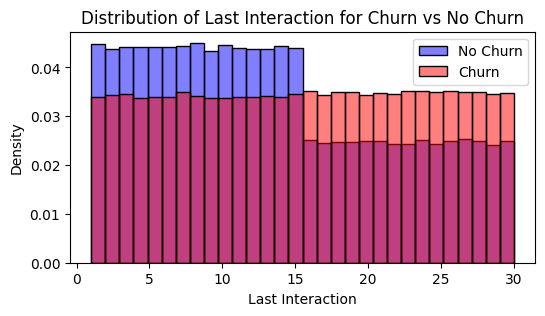

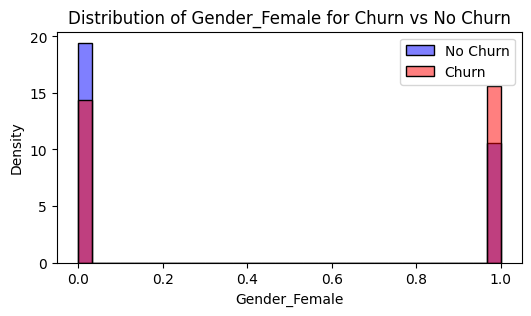

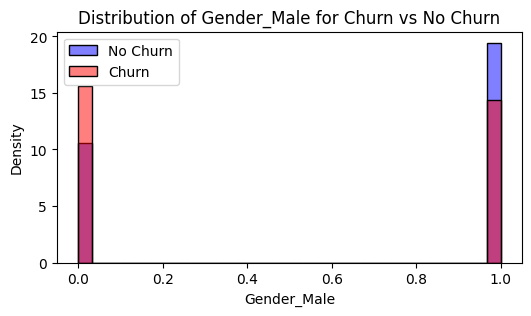

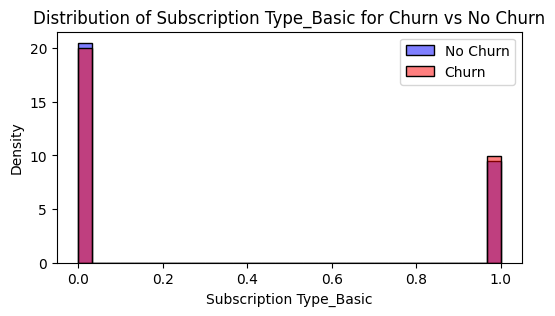

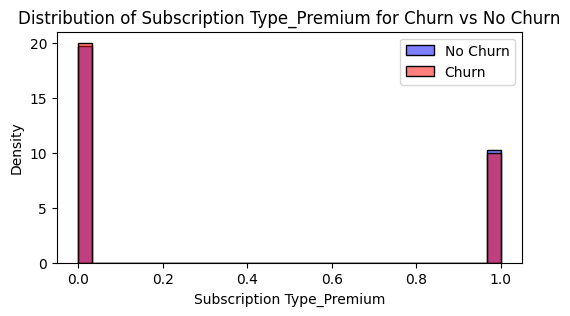

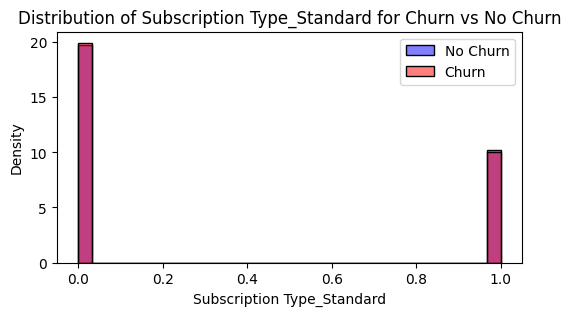

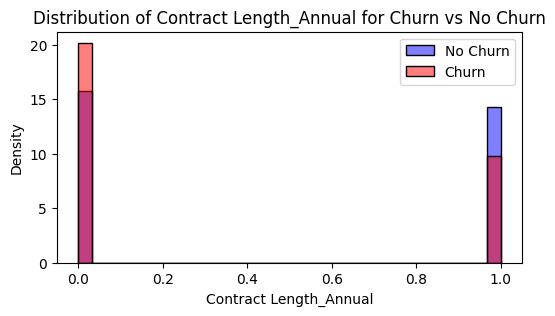

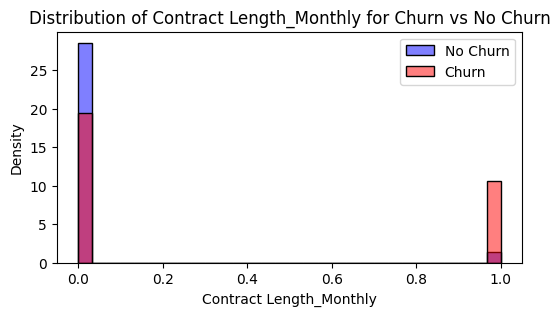

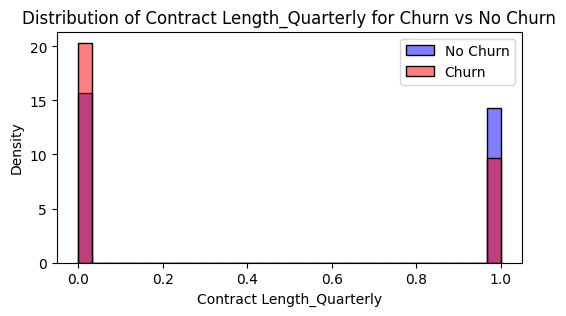

In [25]:
#Histograms of churn and no churn in the newly split training dataset
y_train_named = y_train.rename('Churn')
training_data = pd.concat([X_train, y_train_named], axis=1)

plt.figure(figsize=(6, 3))

features = training_data.drop(columns=['Churn']).columns

for feature in features:
    plt.figure(figsize=(6, 3))
    
    sns.histplot(training_data[training_data['Churn'] == 0][feature], color='blue', label='No Churn', kde=False, stat="density", bins=30, alpha=0.5)
    sns.histplot(training_data[training_data['Churn'] == 1][feature], color='red', label='Churn', kde=False, stat="density", bins=30, alpha=0.5)
    
    plt.title(f'Distribution of {feature} for Churn vs No Churn')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    
    plt.show()

<Figure size 600x300 with 0 Axes>

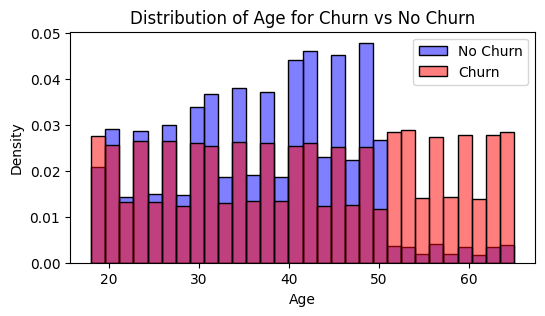

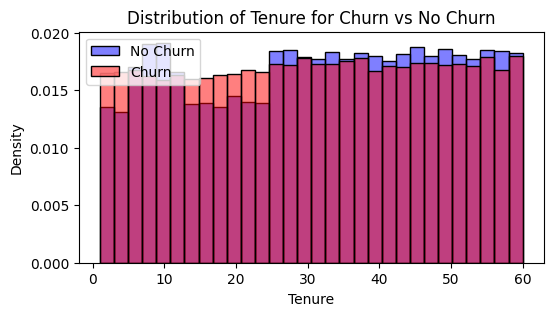

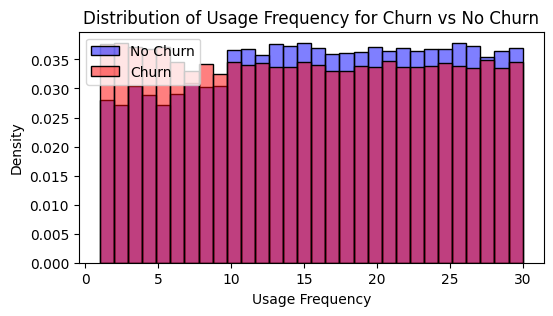

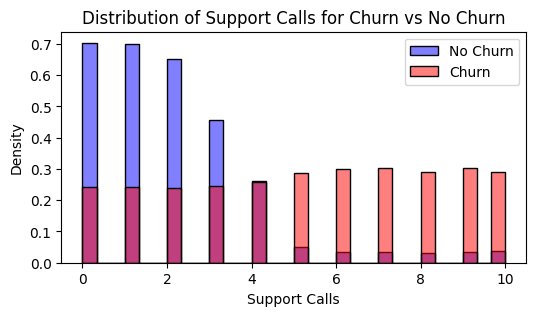

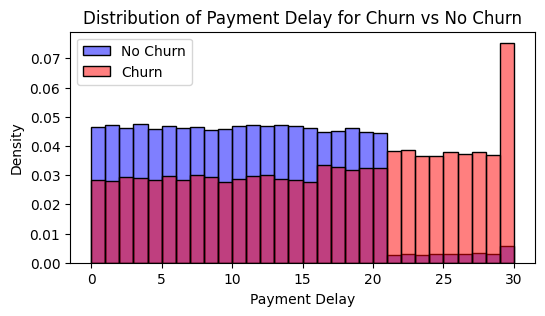

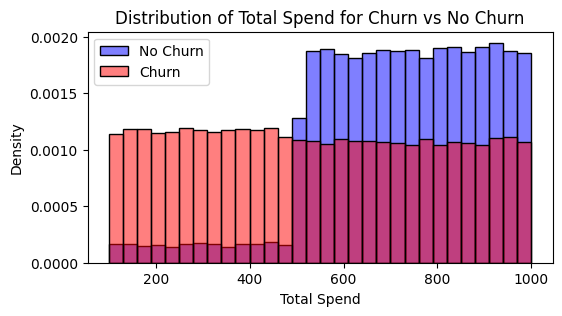

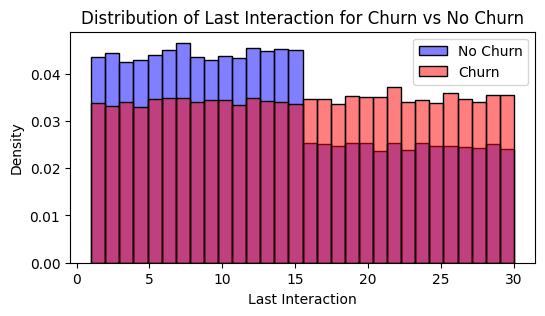

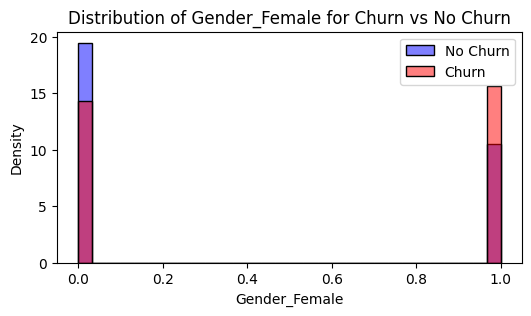

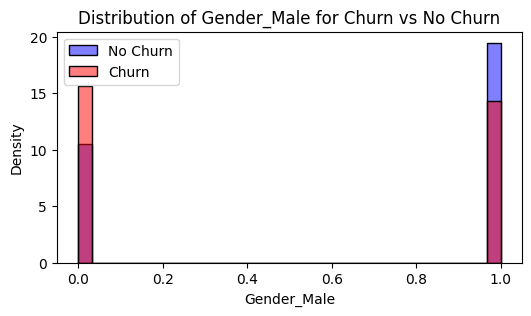

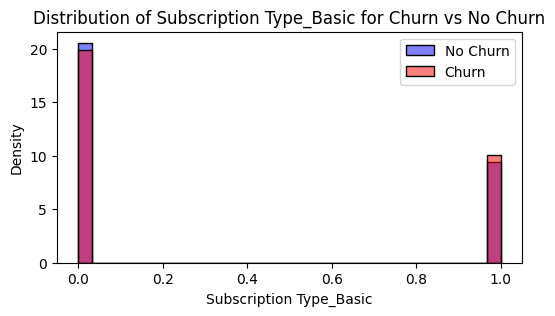

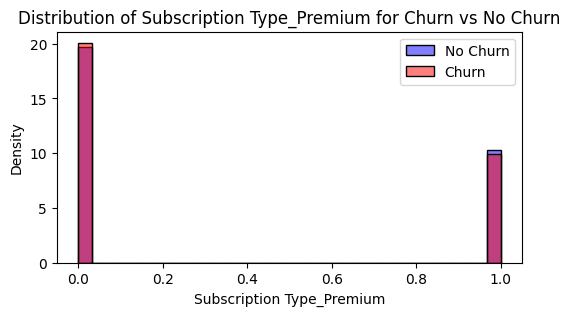

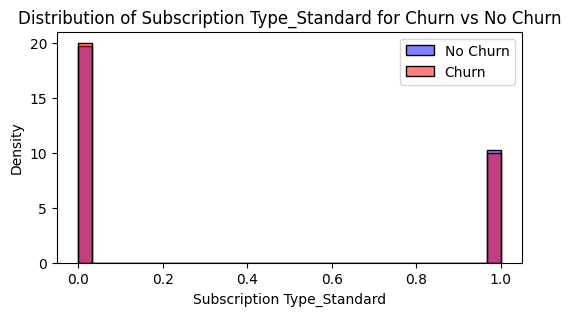

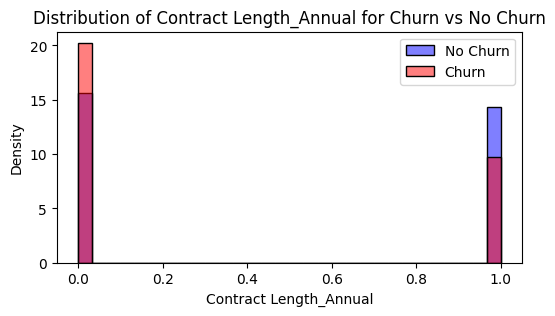

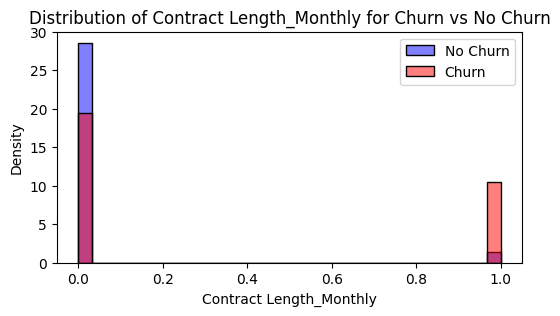

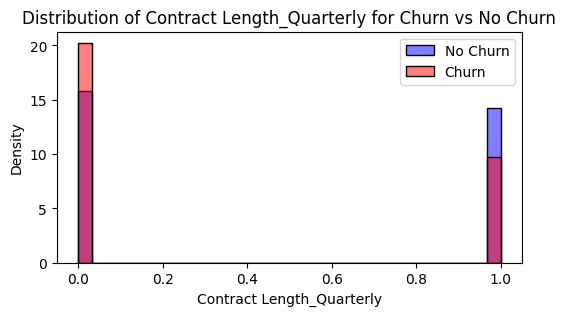

In [26]:
#Histograms of churn and no churn in the newly split testing dataset
y_test_named = y_test.rename('Churn')
testing_data = pd.concat([X_test, y_test_named], axis=1)

plt.figure(figsize=(6, 3))

features = testing_data.drop(columns=['Churn']).columns

for feature in features:
    plt.figure(figsize=(6, 3))
    
    sns.histplot(testing_data[testing_data['Churn'] == 0][feature], color='blue', label='No Churn', kde=False, stat="density", bins=30, alpha=0.5)
    sns.histplot(testing_data[testing_data['Churn'] == 1][feature], color='red', label='Churn', kde=False, stat="density", bins=30, alpha=0.5)
    
    plt.title(f'Distribution of {feature} for Churn vs No Churn')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    
    plt.show()

Logistic Regression

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
lg_loss = log_loss(y_test, probabilities)
acc_score = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
# print('Log loss=' + str(lg_loss) + ', accuracy score: ' + str(acc_score), ', recall : ' + recall)
print(f'Log Loss: {lg_loss}, accuracy score: {acc_score}, precision: {precision}, recall: {recall}')
print('F1 Score: ' + str((2*precision*recall)/(precision+recall)))


Log Loss: 0.3914559962613756, accuracy score: 0.8468557629500604, precision: 0.8731714506798335, recall: 0.846563303801086
F1 Score: 0.8596615334385375


In [24]:
#get the coefficients from the logistic regression model
coefficients = model.coef_[0]
feature_names = X_train.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(coef_df)

                       Feature  Coefficient
0                          Age     0.023196
1                       Tenure    -0.001042
2              Usage Frequency    -0.013593
3                Support Calls     0.406105
4                Payment Delay     0.084297
5                  Total Spend    -0.003159
6             Last Interaction     0.032675
7                Gender_Female     0.132965
8                  Gender_Male    -0.589364
9      Subscription Type_Basic    -0.108340
10   Subscription Type_Premium    -0.178101
11  Subscription Type_Standard    -0.169958
12      Contract Length_Annual    -0.842275
13     Contract Length_Monthly     1.251454
14   Contract Length_Quarterly    -0.865578


Stratifying the 80/20 training and testing split

In [ ]:
y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=1234)

In [ ]:
#Checking imbalance: 
y_train.value_counts(normalize=True)



Churn
1.0    0.555203
0.0    0.444797
Name: proportion, dtype: float64

<Figure size 600x300 with 0 Axes>

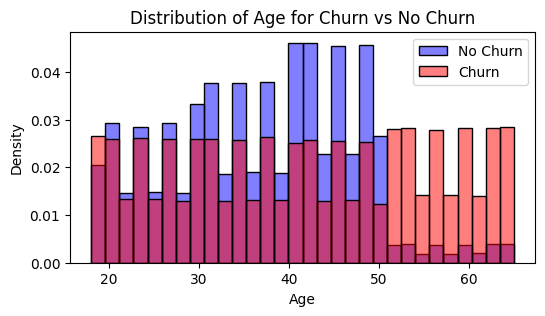

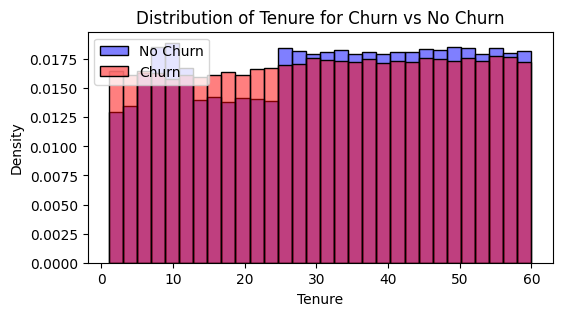

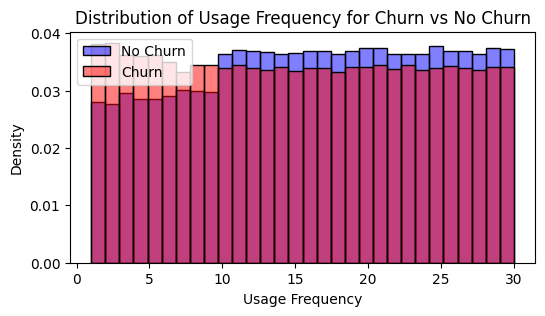

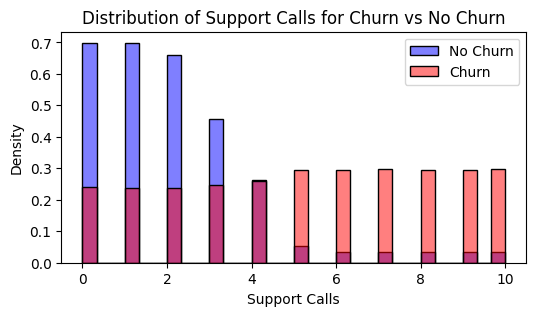

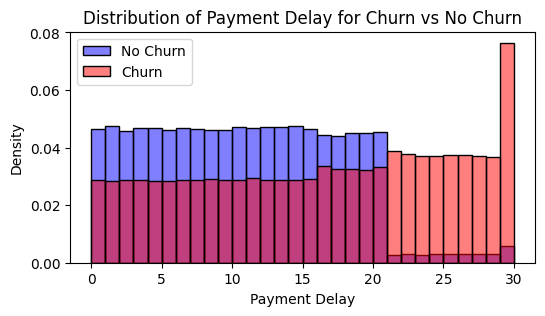

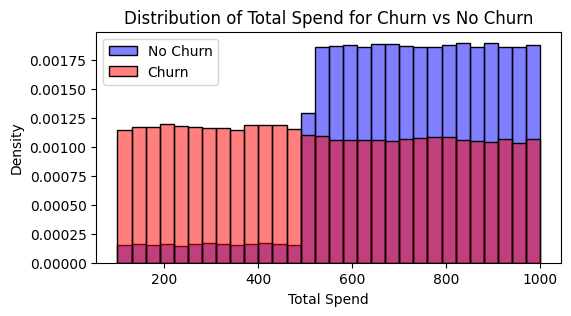

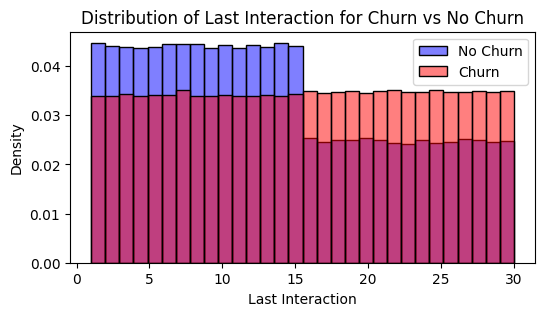

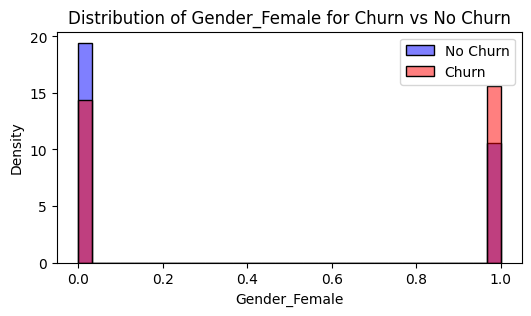

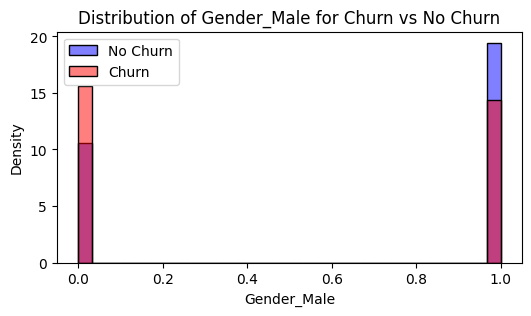

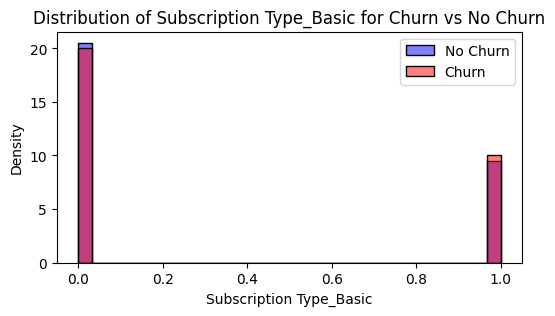

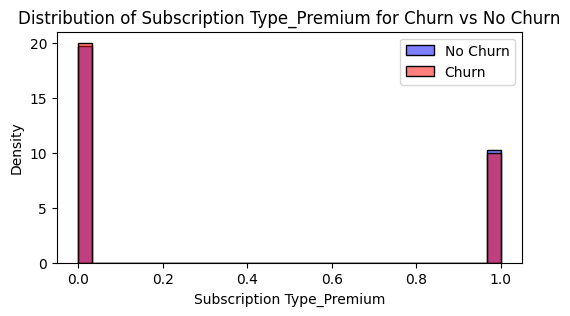

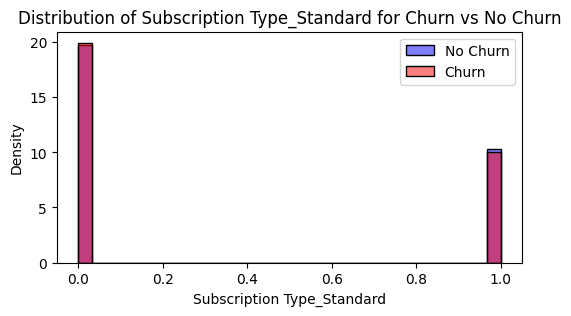

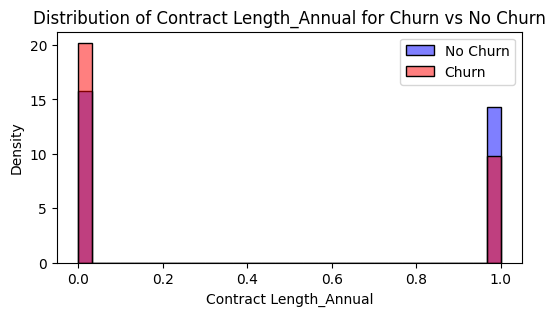

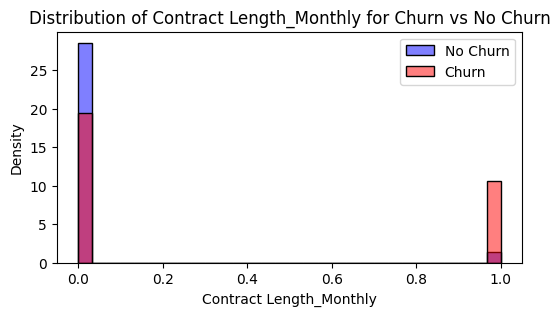

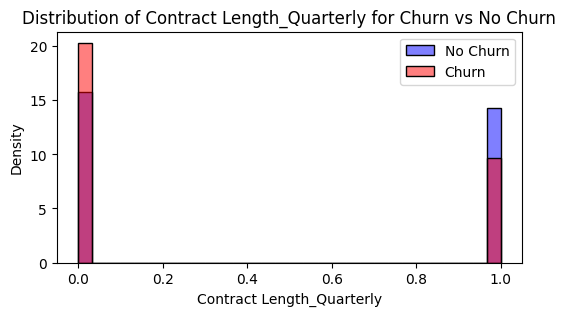

In [31]:
#Histograms of churn and no churn in the newly split training dataset
y_train_named = y_train.rename('Churn')
training_data = pd.concat([X_train, y_train_named], axis=1)

plt.figure(figsize=(6, 3))

features = training_data.drop(columns=['Churn']).columns

for feature in features:
    plt.figure(figsize=(6, 3))
    
    sns.histplot(training_data[training_data['Churn'] == 0][feature], color='blue', label='No Churn', kde=False, stat="density", bins=30, alpha=0.5)
    sns.histplot(training_data[training_data['Churn'] == 1][feature], color='red', label='Churn', kde=False, stat="density", bins=30, alpha=0.5)
    
    plt.title(f'Distribution of {feature} for Churn vs No Churn')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    
    plt.show()

<Figure size 600x300 with 0 Axes>

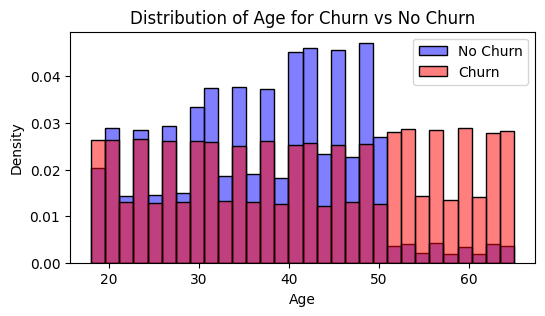

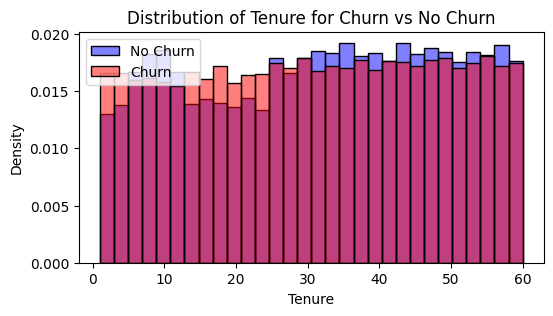

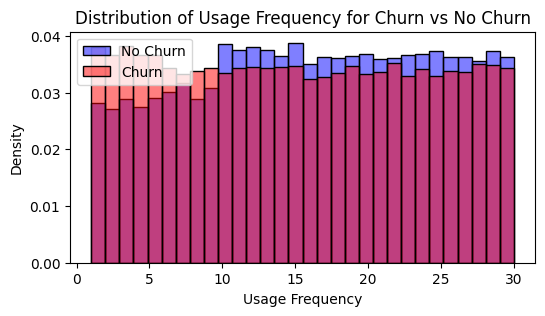

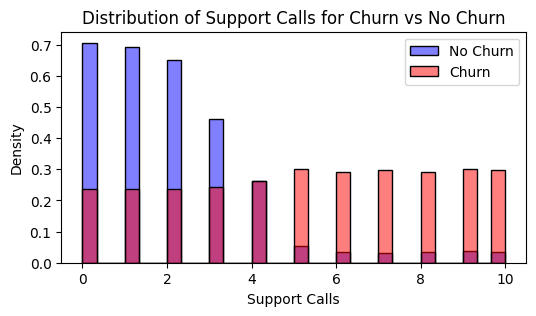

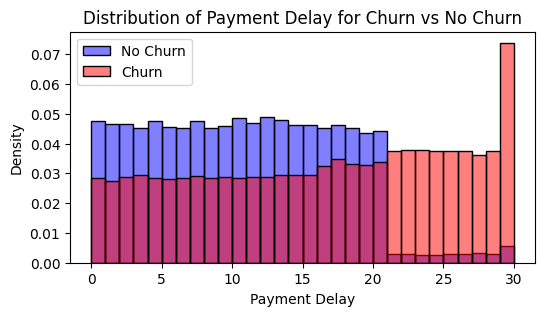

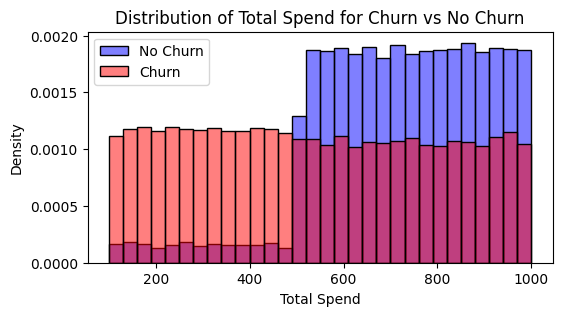

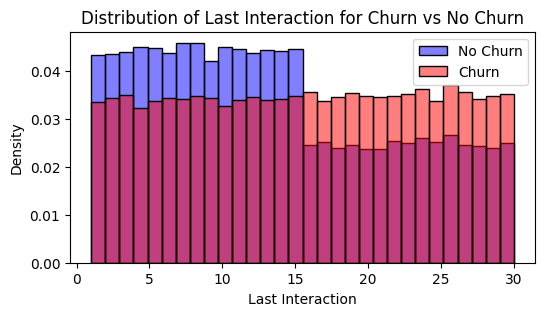

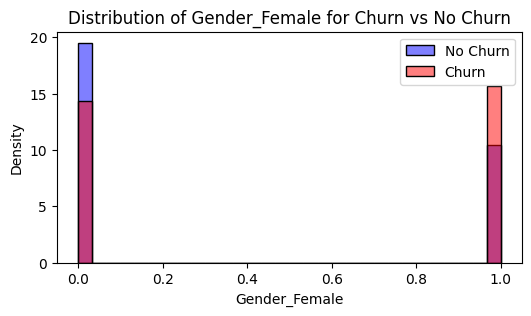

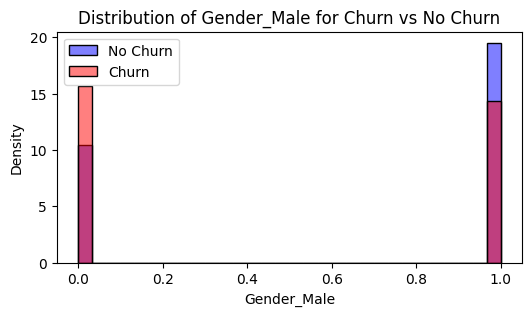

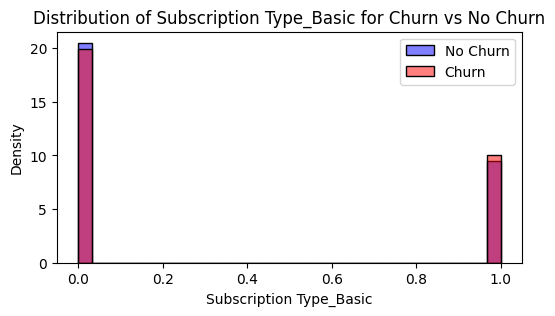

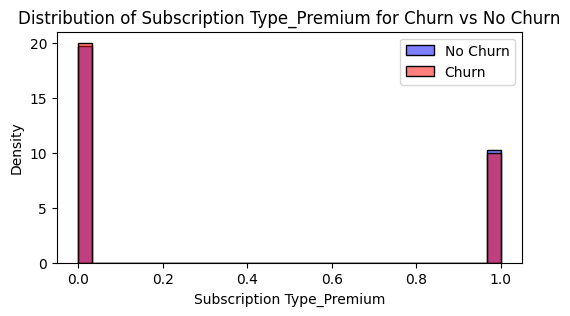

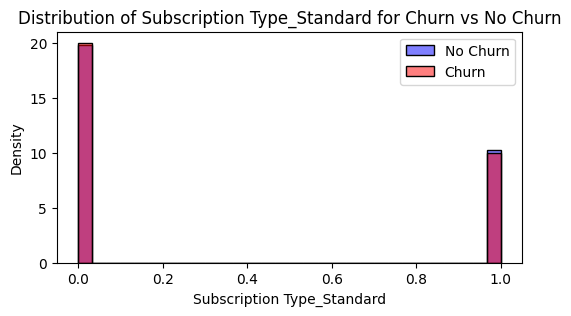

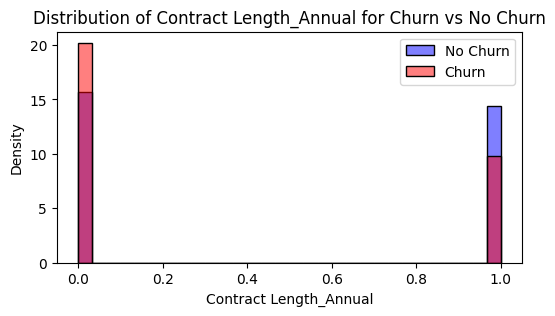

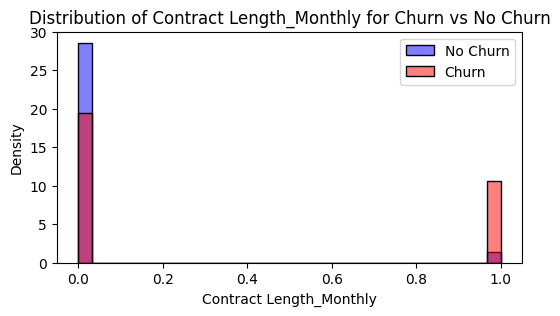

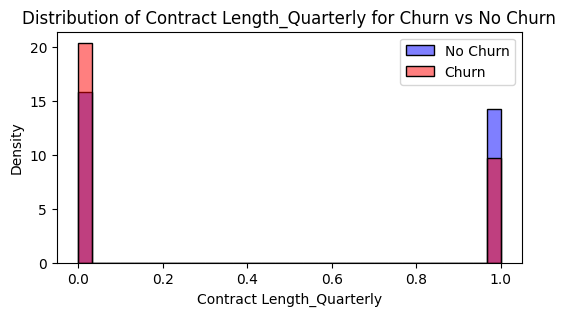

In [32]:
#Histograms of churn and no churn in the newly split testing dataset
y_test_named = y_test.rename('Churn')
testing_data = pd.concat([X_test, y_test_named], axis=1)

plt.figure(figsize=(6, 3))

features = testing_data.drop(columns=['Churn']).columns

for feature in features:
    plt.figure(figsize=(6, 3))
    
    sns.histplot(testing_data[testing_data['Churn'] == 0][feature], color='blue', label='No Churn', kde=False, stat="density", bins=30, alpha=0.5)
    sns.histplot(testing_data[testing_data['Churn'] == 1][feature], color='red', label='Churn', kde=False, stat="density", bins=30, alpha=0.5)
    
    plt.title(f'Distribution of {feature} for Churn vs No Churn')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    
    plt.show()

Logistic Regression with Stratisfied Sampling

In [29]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
lg_loss = log_loss(y_test, probabilities)
acc_score = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
# print('Log loss=' + str(lg_loss) + ', accuracy score: ' + str(acc_score), ', recall : ' + recall)
print(f'Log Loss: {lg_loss}, accuracy score: {acc_score}, precision: {precision}, recall: {recall}')
print('F1 Score: ' + str((2*precision*recall)/(precision+recall)))


Log Loss: 0.3864621955221765, accuracy score: 0.8506363690346589, precision: 0.8748834402940047, recall: 0.8529563806841477
F1 Score: 0.8637807783955519


In [ ]:
#Get the coefficients from the logistic regression model
coefficients = model.coef_[0]
feature_names = X_train.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(coef_df)

                       Feature  Coefficient
0                          Age     0.023301
1                       Tenure    -0.000928
2              Usage Frequency    -0.013155
3                Support Calls     0.404287
4                Payment Delay     0.083627
5                  Total Spend    -0.003161
6             Last Interaction     0.032619
7                Gender_Female     0.132672
8                  Gender_Male    -0.588491
9      Subscription Type_Basic    -0.108158
10   Subscription Type_Premium    -0.175629
11  Subscription Type_Standard    -0.172032
12      Contract Length_Annual    -0.843468
13     Contract Length_Monthly     1.243341
14   Contract Length_Quarterly    -0.855692


Decision tree

In [ ]:
#This function will be called for each model to calculate the evaluation metrics
def get_stats(y_test, y_pred, probabilities):
    acc_score = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    lg_loss = log_loss(y_test, probabilities)
    print(f'Log Loss: {lg_loss}, accuracy score: {acc_score}, precision: {precision}, recall: {recall}')
    print('F1 Score: ' + str((2*precision*recall)/(precision+recall)))

In [34]:
from sklearn.tree import DecisionTreeClassifier
y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

dt = DecisionTreeClassifier(criterion='log_loss', max_depth=7, min_samples_leaf=4, random_state=1234)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
probabilities = dt.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)




Log Loss: 0.22085196646812102, accuracy score: 0.9283462735608636, precision: 0.897789537960513, recall: 0.9828337656087062
F1 Score: 0.9383887465854261


Fine-tuning Decision Tree

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],  # Testing different tree depths
    'min_samples_leaf': [2, 4]  # Minimum samples required at leaf nodes
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model using grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'{best_params}, {best_model}')

{'max_depth': 7, 'min_samples_leaf': 4}, DecisionTreeClassifier(criterion='log_loss', max_depth=7, min_samples_leaf=4,
                       random_state=1234)


In [36]:
feature_names = X.columns
feature_names

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Gender_Female', 'Gender_Male',
       'Subscription Type_Basic', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Contract Length_Annual',
       'Contract Length_Monthly', 'Contract Length_Quarterly'],
      dtype='object')

In [37]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

text_representation = tree.export_text(dt, feature_names=feature_names)
print(text_representation)

|--- Support Calls <= 4.50
|   |--- Total Spend <= 500.01
|   |   |--- Payment Delay <= 20.50
|   |   |   |--- Usage Frequency <= 2.50
|   |   |   |   |--- Contract Length_Annual <= 0.50
|   |   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |   |--- Tenure <= 51.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Tenure >  51.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Age >  23.50
|   |   |   |   |   |   |--- Tenure <= 54.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Tenure >  54.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Contract Length_Annual >  0.50
|   |   |   |   |   |--- Total Spend <= 315.00
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Total Spend >  315.00
|   |   |   |   |   |   |--- Tenure <= 8.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Tenure >  8.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- Us

In [38]:
fig = plt.figure(figsize=(200,50))
_ = tree.plot_tree(dt,
                   feature_names=feature_names,
                   class_names=['No Churn','Churn'],
                   filled=True)

Random forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

rf = RandomForestClassifier(criterion='log_loss', n_estimators=20)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
probabilities = rf.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)

Log Loss: 0.31975839818395174, accuracy score: 0.9324683422158222, precision: 0.8977575434687848, recall: 0.9912564507072381
F1 Score: 0.9421930794352738


Fine-tuning Random Forest

In [ ]:
#This turns out to be the best performing Random Forest model
from sklearn.ensemble import RandomForestClassifier

y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
probabilities = rf.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)

Log Loss: 0.19553955420355074, accuracy score: 0.9344229846152323, precision: 0.8976537444438193, recall: 0.9953742078665205
F1 Score: 0.9439917500676224


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 5, 15] 
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model using grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'{best_params}, {best_model}')

{'max_depth': None, 'n_estimators': 100}, RandomForestClassifier()


Hist Gradient Boosting Classifier

In [ ]:
#Intial HGBC with all default parameters
from sklearn.ensemble import HistGradientBoostingClassifier

y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train, y_train)

y_pred = hgbc.predict(X_test)
probabilities = hgbc.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)

Log Loss: 0.1849109870282681, accuracy score: 0.9358976262228886, precision: 0.8976241035297888, recall: 0.9984135048174193
F1 Score: 0.9453399270861462


Fine-tuning Hist Gradient Boosting Classifier

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_iter': [50, 100, 150],  
    'learning_rate': [0.1, 0.5, 1] 
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=hgbc, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model using grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'{best_params}, {best_model}')

{'learning_rate': 0.1, 'max_iter': 100}, HistGradientBoostingClassifier()


In [ ]:
#Best performance for HGBC
y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

hgbc = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1)
hgbc.fit(X_train, y_train)

y_pred = hgbc.predict(X_test)
probabilities = hgbc.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)

Log Loss: 0.18501698134004516, accuracy score: 0.9359075231464299, precision: 0.8976576085649948, recall: 0.9983867661345669
F1 Score: 0.9453465212841373


XGBoost

In [44]:
import xgboost as xgb

y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

xgb_clf = xgb.XGBClassifier(
    objective='binary:hinge',
    eval_metric='auc',
    # 'objective': 'binary:logistic',
    # 'eval_metric': 'auc',
    # 'eta': 0.1,
    # 'max_depth': 6,
    # 'min_child_weight': 1,
    # 'subsample': 0.8,
    # 'colsample_bytree': 0.8,
    # 'lambda': 1.0,
    # 'alpha': 0.0,
    # 'n_estimators': 500
)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
probabilities = xgb_clf.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)

Log Loss: 1.0411940725570268, accuracy score: 0.9346902015508479, precision: 0.8975639923859703, recall: 0.9960426749378326
F1 Score: 0.9442425983506827
